### Import dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.model_selection import cross_val_score

### Import Data

In [2]:
df_values=pd.read_csv('values.csv')
df_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
df_labels=pd.read_csv('labels.csv')
df_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
df_values.shape

(180, 14)

In [5]:
df_labels.shape

(180, 2)

In [6]:
df_values.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [7]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

### Check for null values

In [8]:
df_values.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

### Statistical measures about the Data

In [9]:
df_values.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


## EDA

###  Correlation Matrix

In [10]:
df_values.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811


### Correlation plot for features

<Figure size 1440x720 with 0 Axes>

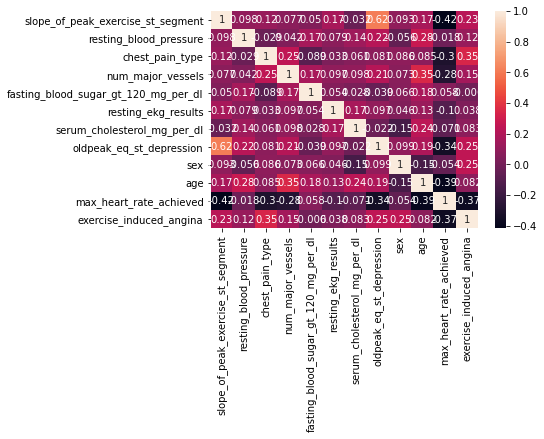

<Figure size 1440x720 with 0 Axes>

In [11]:
sns.heatmap(df_values.corr(), annot=True)
plt.figure(figsize=(20,10))

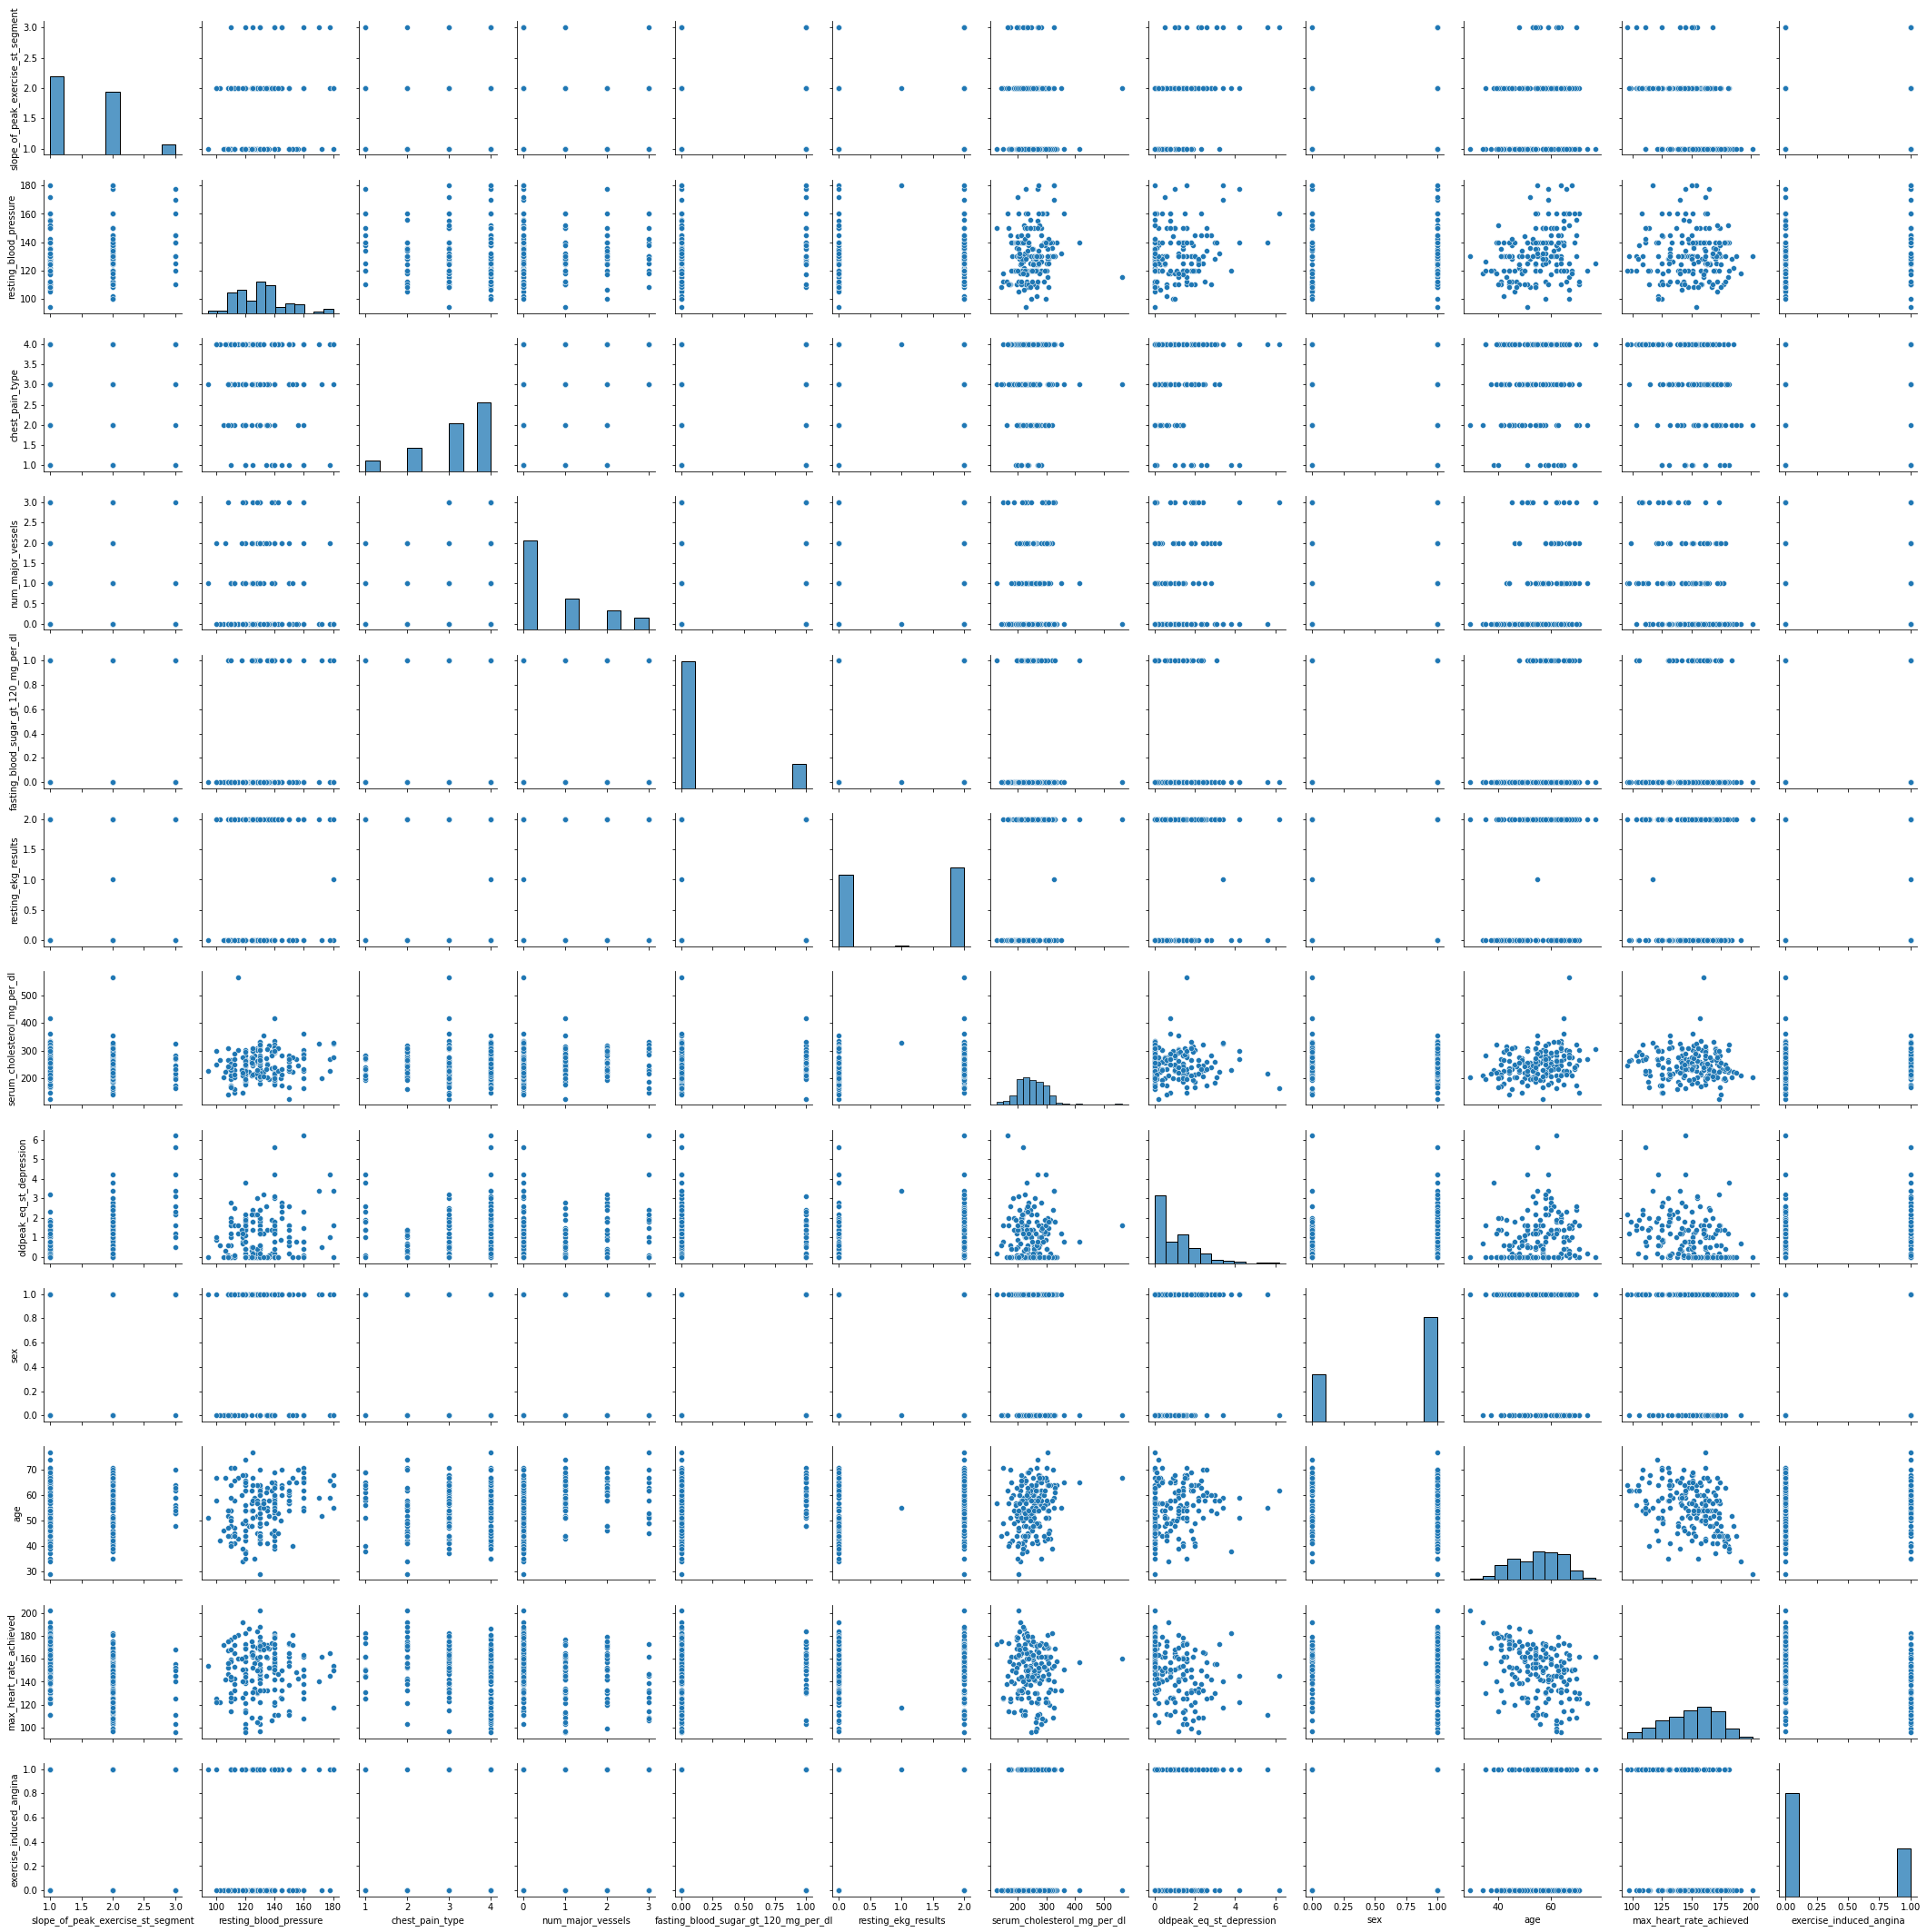

In [12]:
sns.pairplot(df_values)

### Check for outlier

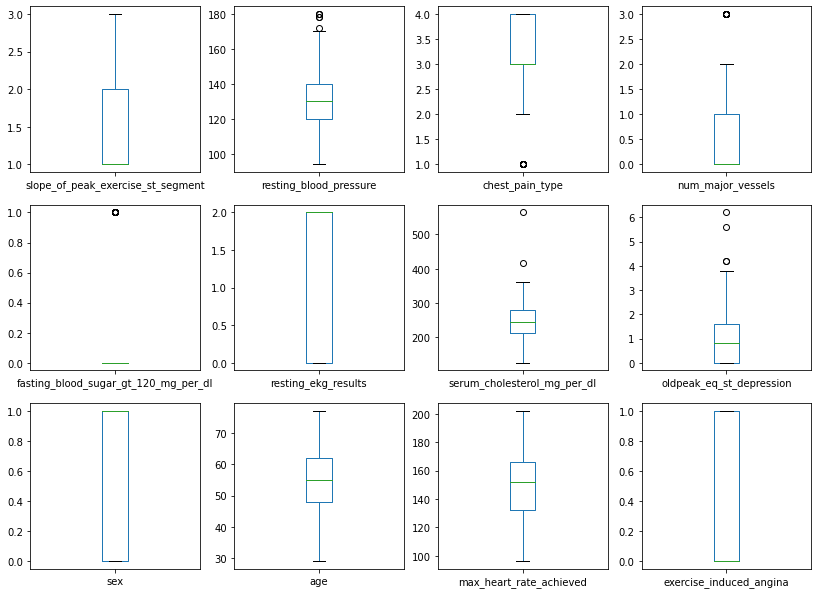

In [13]:
df_values.plot(kind='box',figsize=(14,14),layout=(4,4),sharex=False,subplots=True);

<AxesSubplot:xlabel='chest_pain_type', ylabel='age'>

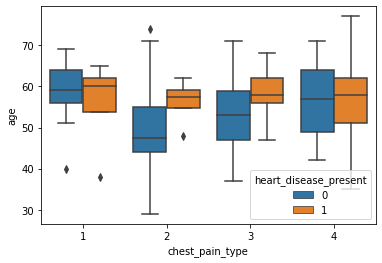

In [15]:
sns.boxplot(data=df_values,x='chest_pain_type',y='age',hue=df_labels['heart_disease_present'])

#### Females not having heart disease have outlier in their cholesterole level

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

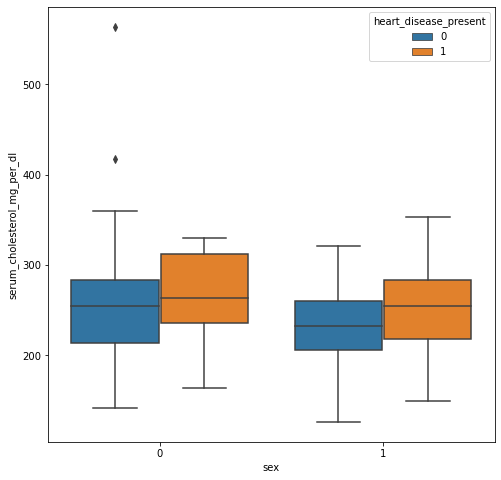

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(x='sex',y='serum_cholesterol_mg_per_dl',hue=df_labels['heart_disease_present'],data=df_values,)

### Check for the distribution of target variable

In [17]:
df_labels['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

#### There are more healthy patients than diseased

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

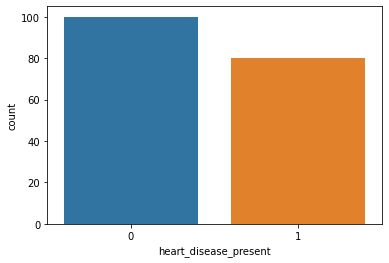

In [18]:
sns.countplot(x='heart_disease_present',data=df_labels)

In [19]:
df_values['slope_of_peak_exercise_st_segment'].value_counts(ascending=False)

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

In [20]:
df_values['chest_pain_type'].value_counts(ascending=True)

1    13
2    28
3    57
4    82
Name: chest_pain_type, dtype: int64

In [21]:
df_values['thal'].value_counts(ascending=False)

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [22]:
pd.DataFrame(df_values['resting_blood_pressure'].value_counts(ascending=True))

,resting_blood_pressure
94,1
144,1
122,1
155,1
156,1
170,1
117,1
106,1
105,1
102,1


E:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='Density'>

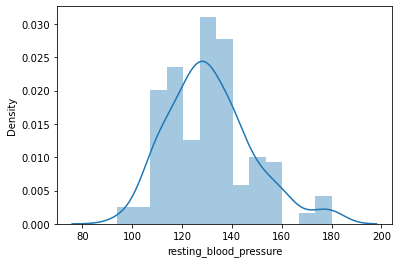

In [23]:
sns.distplot(df_values['resting_blood_pressure'])

In [24]:
df_values['chest_pain_type'].value_counts(ascending=False)

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [25]:
df_values['num_major_vessels'].value_counts(ascending=False)

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

E:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_major_vessels', ylabel='Density'>

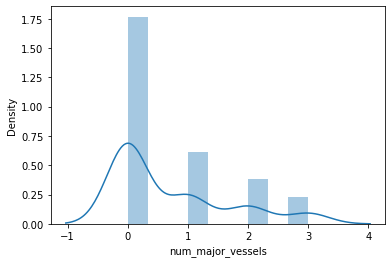

In [26]:
sns.distplot(df_values['num_major_vessels'])

In [27]:
df_values['fasting_blood_sugar_gt_120_mg_per_dl'].value_counts(ascending=False)

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

In [28]:
pd.DataFrame(df_values['resting_ekg_results'].value_counts(ascending=False))

,resting_ekg_results
2,94
0,85
1,1


In [29]:
pd.DataFrame(df_values['serum_cholesterol_mg_per_dl'].value_counts(ascending=False))

,serum_cholesterol_mg_per_dl
204,4
239,4
256,3
234,3
309,3
...,...
295,1
175,1
564,1
172,1


E:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='serum_cholesterol_mg_per_dl', ylabel='Density'>

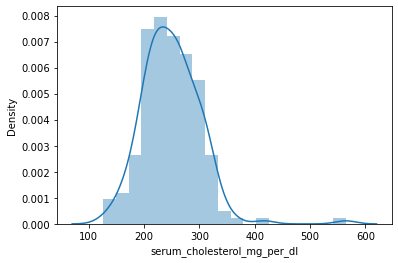

In [30]:
sns.distplot(df_values['serum_cholesterol_mg_per_dl'])

In [31]:
pd.DataFrame(df_values['exercise_induced_angina'].value_counts(ascending=False).unique())

,0
0,123
1,57


E:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Density'>

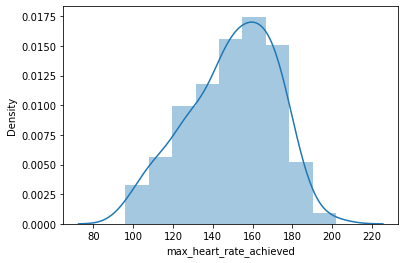

In [32]:
sns.distplot(df_values['max_heart_rate_achieved'])

<AxesSubplot:xlabel='age', ylabel='Count'>

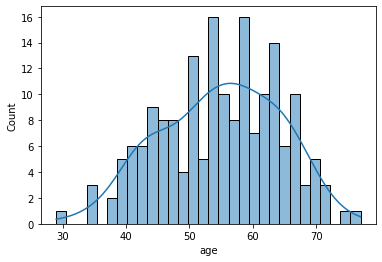

In [33]:
sns.histplot(df_values,x='age',bins=30,kde=True)

In [34]:
df_values1=df_values.drop(columns=['patient_id'])

In [36]:
df_values1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [37]:
df_values1.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [38]:
df_labels1=df_labels.drop(columns=['patient_id'])

In [39]:
df_labels1.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


### sex distribution according to target(heart_disease_present)

#### Males are more susceptible to get heart disease than females

<AxesSubplot:xlabel='sex', ylabel='count'>

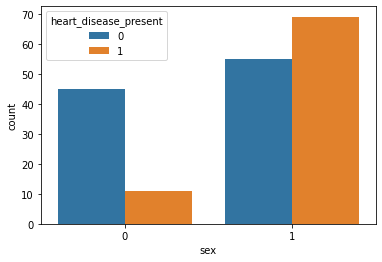

In [40]:
sns.countplot(x='sex',data=df_values,hue=df_labels['heart_disease_present'])

#### men are more likely to have chest pain

<AxesSubplot:xlabel='sex', ylabel='chest_pain_type'>

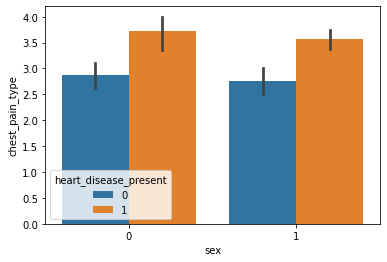

In [41]:
sns.barplot(x='sex',y='chest_pain_type',data=df_values,hue=df_labels['heart_disease_present'])

### chest pain distribution according to target

### chest pain is highly related to target variable

### most of the heart disease patients are found to have chest pain type 4

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

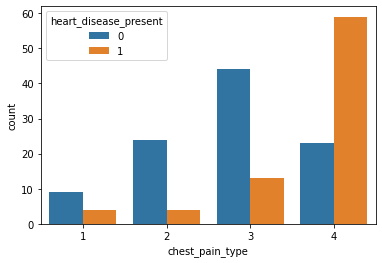

In [42]:
sns.countplot(x='chest_pain_type',data=df_values,hue=df_labels['heart_disease_present'])

#### there are higher number of heart disease patients without diabetes.so it might not be a strong feature differentiating the target.

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='count'>

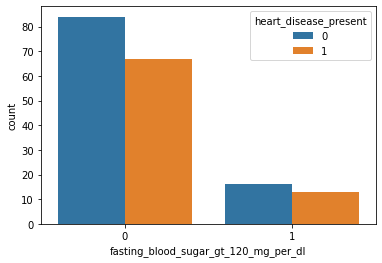

In [43]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',data=df_values,hue=df_labels['heart_disease_present'])

### heart disease is very common in seniors (app 60 and above) and also in adults

<AxesSubplot:xlabel='age', ylabel='count'>

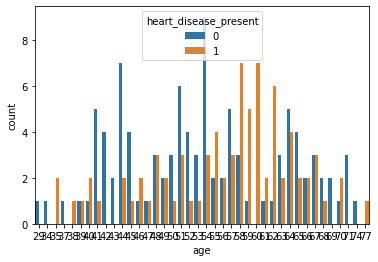

In [44]:
sns.countplot(x='age',data=df_values,hue=df_labels['heart_disease_present'])

### males are more sensitive to thallium stress test

<AxesSubplot:xlabel='sex', ylabel='count'>

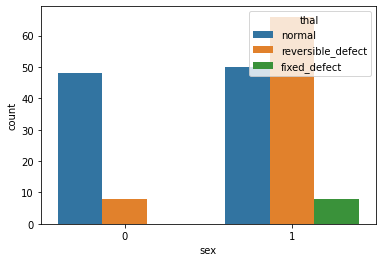

In [45]:
sns.countplot(x='sex',data=df_values,hue='thal')

### Most of the females are in the range of fifty five to sixty six were having heart disease.In case of males it ranges from extreme low to very high

### Cholestrol level is high in case of both males and females havinh heart disease

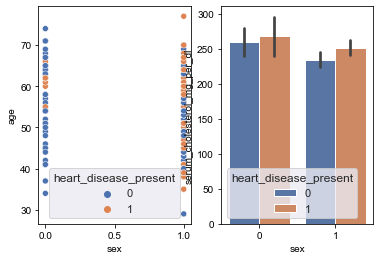

In [46]:
fig,axes=plt.subplots(1,2)
sns.set(rc={'figure.figsize':(8,4)});np.random.seed(0)
sns.scatterplot(x='sex',y='age',data=df_values,hue=df_labels['heart_disease_present'],ax=axes[0])
sns.barplot(x='sex',y='serum_cholesterol_mg_per_dl',data=df_values,hue=df_labels['heart_disease_present'],ax=axes[1])
plt.show()

### resting blood pressure variation according to age

<AxesSubplot:xlabel='age', ylabel='resting_blood_pressure'>

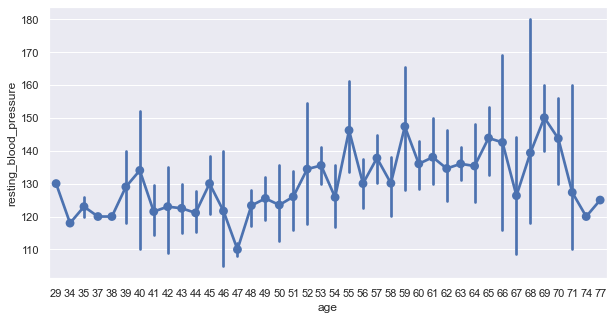

In [47]:
plt.figure(figsize=(10,5))
sns.pointplot(x='age',y='resting_blood_pressure',data=df_values)

In [48]:
df_values.groupby(['sex','chest_pain_type'])['exercise_induced_angina'].count()

sex  chest_pain_type
0    1                   2
     2                  13
     3                  22
     4                  19
1    1                  11
     2                  15
     3                  35
     4                  63
Name: exercise_induced_angina, dtype: int64

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

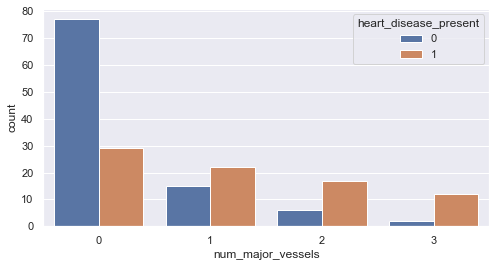

In [49]:
sns.countplot(x='num_major_vessels',hue=df_labels['heart_disease_present'],data=df_values)

<AxesSubplot:xlabel='sex', ylabel='count'>

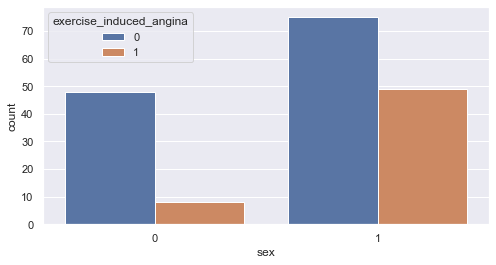

In [50]:
sns.countplot(x='sex',hue='exercise_induced_angina',data=df_values)

<AxesSubplot:xlabel='thal', ylabel='count'>

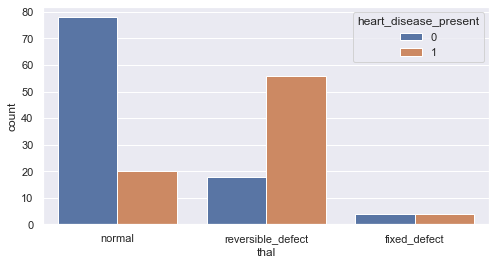

In [51]:
sns.countplot(x='thal',hue=df_labels['heart_disease_present'],data=df_values)

In [52]:
df_values1.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

### Label Encoder

In [55]:
le = LabelEncoder()
df_values1.thal = le.fit_transform(df_values1.thal)

In [56]:
df_values1.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0


### Outlier Removal

In [57]:
Q1 = np.percentile(df_values1.resting_blood_pressure, 25)
Q1 = np.percentile(df_values1.chest_pain_type, 25)
Q1 = np.percentile(df_values1.num_major_vessels, 25)
Q1 = np.percentile(df_values1.fasting_blood_sugar_gt_120_mg_per_dl, 25)
Q1 = np.percentile(df_values1.serum_cholesterol_mg_per_dl, 25)
Q1 = np.percentile(df_values1.oldpeak_eq_st_depression, 25)
Q1

0.0

In [58]:
Q3 = np.percentile(df_values1.resting_blood_pressure, 75)
Q3 = np.percentile(df_values1.chest_pain_type, 75)
Q3 = np.percentile(df_values1.num_major_vessels, 75)
Q3 = np.percentile(df_values1.fasting_blood_sugar_gt_120_mg_per_dl, 75)
Q3 = np.percentile(df_values1.serum_cholesterol_mg_per_dl, 75)
Q3 = np.percentile(df_values1.oldpeak_eq_st_depression, 75)
Q3

1.6

In [59]:
IQR = Q3 - Q1
IQR

1.6

In [60]:
lower_limit= Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [61]:
df_values1 [ (df_values1.resting_blood_pressure < lower_limit) | (df_values1.resting_blood_pressure > upper_limit) ]
df_values1 [ (df_values1. chest_pain_type< lower_limit) | (df_values1.chest_pain_type> upper_limit) ]
df_values1 [ (df_values1.num_major_vessels< lower_limit) | (df_values1.num_major_vessels > upper_limit) ]
df_values1 [ (df_values1.fasting_blood_sugar_gt_120_mg_per_dl < lower_limit) | (df_values1.fasting_blood_sugar_gt_120_mg_per_dl > upper_limit) ]
df_values1 [ (df_values1.serum_cholesterol_mg_per_dl < lower_limit) | (df_values1.serum_cholesterol_mg_per_dl > upper_limit) ]
df_values1 [ (df_values1.oldpeak_eq_st_depression< lower_limit) | (df_values1.oldpeak_eq_st_depression > upper_limit) ]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
112,2,2,140,4,3,0,0,298,4.2,1,51,122,1
140,3,2,140,4,0,0,0,217,5.6,1,55,111,1
162,3,2,160,4,3,0,2,164,6.2,0,62,145,0


In [62]:
df_labels1=df_labels1.drop([4,112,140,162],axis=0)
df_labels1.tail()

,heart_disease_present
175,1
176,1
177,1
178,0
179,0


In [63]:
df_temp = df_values1 [ (df_values1.resting_blood_pressure >= lower_limit) & (df_values1.resting_blood_pressure <= upper_limit) ]
df_temp = df_values1 [ (df_values1.chest_pain_type >= lower_limit) & (df_values1.chest_pain_type <= upper_limit) ]
df_temp = df_values1 [ (df_values1.num_major_vessels >= lower_limit) & (df_values1.num_major_vessels <= upper_limit) ]
df_temp = df_values1 [ (df_values1.fasting_blood_sugar_gt_120_mg_per_dl >= lower_limit) & (df_values1.fasting_blood_sugar_gt_120_mg_per_dl <= upper_limit) ]
df_temp = df_values1 [ (df_values1.serum_cholesterol_mg_per_dl >= lower_limit) & (df_values1.serum_cholesterol_mg_per_dl <= upper_limit) ]
df_temp = df_values1 [ (df_values1.oldpeak_eq_st_depression >= lower_limit) & (df_values1.oldpeak_eq_st_depression<= upper_limit) ]

In [64]:
df_temp

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
5,1,1,130,3,0,0,0,180,0.0,1,42,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [65]:
ss = StandardScaler()

df_temp.ss = pd.DataFrame(ss.fit_transform(df_temp), columns=df_temp.columns)

<ipython-input-65-9b565b67ca86>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_temp.ss = pd.DataFrame(ss.fit_transform(df_temp), columns=df_temp.columns)


In [66]:
df_temp.ss.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.881362,-0.623628,-0.167555,-1.245821,-0.716933,-0.444161,0.952825,1.113177,-0.977644,0.67420,-1.040316,0.915134,-0.67420
1,0.804722,-0.623628,-1.250852,-0.165700,-0.716933,-0.444161,-1.055524,-0.674997,0.725973,-1.48324,-0.081700,0.368538,-0.67420
2,-0.881362,-0.623628,-0.348105,0.914420,2.464079,-0.444161,0.952825,1.037085,-0.977644,0.67420,2.368096,0.550737,1.48324
3,-0.881362,1.146670,1.276840,0.914420,-0.716933,-0.444161,-1.055524,-0.503789,-0.977644,0.67420,-1.572881,1.416181,-0.67420
4,-0.881362,-0.623628,-0.047189,-0.165700,-0.716933,-0.444161,-1.055524,-1.321783,-0.977644,0.67420,-1.359855,0.004141,-0.67420


### Split the features and target

In [67]:
X = df_temp.ss.iloc[:, :]
y=df_labels1.heart_disease_present

### Split the data into train data and test data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

### Model training

#### Logistic Regression

In [69]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [70]:
y_predict = model.predict(X_test)

In [71]:
accuracy_score(y_test, y_predict)

0.9444444444444444

In [72]:
confusion_matrix(y_test, y_predict)

array([[19,  2],
       [ 0, 15]], dtype=int64)

In [73]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,19,2
1,0,15


In [74]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.88      1.00      0.94        15

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



#### KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [76]:
y_predict = model.predict(X_test)

In [77]:
accuracy_score(y_test, y_predict)

0.9166666666666666

In [78]:
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

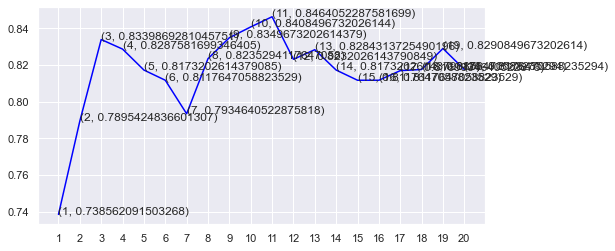

In [79]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
    plt.xticks([i for i in range(1,21)])

In [80]:
confusion_matrix(y_test, y_predict)

array([[19,  2],
       [ 1, 14]], dtype=int64)

In [81]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



#### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_predict = model.predict(X_test)

In [84]:
accuracy_score(y_test, y_predict)

0.9166666666666666

In [85]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,18,3
1,0,15


In [86]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.83      1.00      0.91        15

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36

